In [24]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

In [22]:
onet_skills = pd.read_csv('onet_skills_unstacked.csv', index_col=['O*NET-SOC Code', 'Title'])

In [ ]:
SEED = 42

# Finding Ideal Number of Components In Mixture Model

In [27]:
aic = []
bic = []
range_components_trying = range(2, 20)
for i in range_components_trying:
    gmm = GaussianMixture(n_components=i, random_state=SEED).fit(onet_skills.values)
    aic.append(gmm.aic(onet_skills.values))
    bic.append(gmm.bic(onet_skills.values))

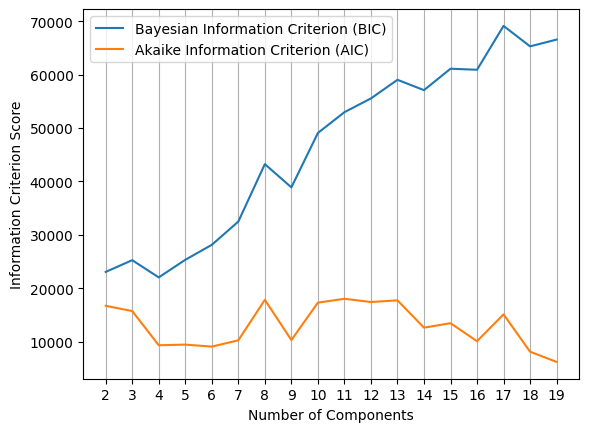

In [37]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_xticks(ticks = range(len(range_components_trying)), labels = range_components_trying)
axes.grid(visible=True, axis='x')
axes.set_ylabel('Information Criterion Score')
axes.set_xlabel('Number of Components')

axes.plot(bic)
axes.plot(aic)
axes.legend(['Bayesian Information Criterion (BIC)', 'Akaike Information Criterion (AIC)'])

The graphs seem to indicate that a model with <i>4 components</i> is both relatively well-performing and still parsimonious.

# Fitting and Assessing Model

In [48]:
gmm = GaussianMixture(n_components=4, random_state=SEED).fit(onet_skills.values)

onet_skills['Cluster'] = gmm.predict(onet_skills.values)

# Training Decision Tree on Assigned Clusters as an Attempted Explanation